# Data Extraction and Transformation

In [0]:
import re
import os
import numpy as np
import pandas as pd

from pyspark.sql import functions as f

In [0]:
import sys
!{sys.executable} -m pip install gdown
import gdown
import gzip
import json

Requirement already satisfied: gdown in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (3.12.2)
Requirement already satisfied: filelock in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from gdown) (3.0.12)
Requirement already satisfied: six in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from gdown) (1.14.0)
Requirement already satisfied: tqdm in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from gdown) (4.42.1)
Requirement already satisfied: requests[socks] in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from gdown) (2.22.0)
Requirement already satisfied: urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1 in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from requests[socks]->gdown) (1.25.8)
Requirement already satisfied: idna<2.9,>=2.5 in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from requests[socks]->gdown) (2.8)
Requirement already satisfied: certifi>=2017.4.17 in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from requests[socks]->gdown) (2020.6.20)
Requirement already satisfied: chardet<3.1.0,>=3.0.2 in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from requests[socks]->gdown) (3.0.4)
Requirement already satisfied: PySocks!=1.5.7,>=1.5.6; extra == "socks" in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from requests[socks]->gdown) (1.7.1)

In [0]:
%sh
gdown 'https://drive.google.com/uc?id=1LXpK1UfqtP89H1tYy0pBGHjYk8IhigUK'
gdown 'https://drive.google.com/uc?id=1ah0_KpUterVi-AHxJ03iKD6O0NfbK0md'
gzip -d goodreads_books.json.gz goodreads_book_genres_initial.json.gz

Downloading...
From: https://drive.google.com/uc?id=1LXpK1UfqtP89H1tYy0pBGHjYk8IhigUK
To: /databricks/driver/goodreads_books.json.gz

0.00B [00:00, ?B/s]
4.72MB [00:00, 36.1MB/s]
8.91MB [00:00, 23.1MB/s]
17.3MB [00:00, 25.2MB/s]
25.7MB [00:00, 28.6MB/s]
34.1MB [00:01, 25.8MB/s]
42.5MB [00:01, 27.1MB/s]
50.9MB [00:01, 32.0MB/s]
59.2MB [00:01, 37.8MB/s]
67.6MB [00:02, 38.4MB/s]
76.0MB [00:02, 43.9MB/s]
84.4MB [00:02, 26.3MB/s]
101MB [00:03, 31.5MB/s] 
110MB [00:04, 16.7MB/s]
126MB [00:04, 21.3MB/s]
143MB [00:04, 26.6MB/s]
157MB [00:04, 35.2MB/s]
165MB [00:05, 35.1MB/s]
177MB [00:05, 33.5MB/s]
202MB [00:05, 36.2MB/s]
227MB [00:06, 45.3MB/s]
235MB [00:07, 13.5MB/s]
260MB [00:07, 18.8MB/s]
271MB [00:08, 21.8MB/s]
279MB [00:08, 21.3MB/s]
303MB [00:09, 26.3MB/s]
319MB [00:09, 26.8MB/s]
344MB [00:10, 31.1MB/s]
353MB [00:10, 26.3MB/s]
373MB [00:10, 35.6MB/s]
382MB [00:11, 25.6MB/s]
403MB [00:11, 32.6MB/s]
420MB [00:11, 41.2MB/s]
437MB [00:11, 53.0MB/s]
454MB [00:11, 63.9MB/s]
470MB [00:12, 67.0MB/s]
494MB [00:12, 85.1MB/s]
508MB [00:12, 69.4MB/s]
521MB [00:12, 73.2MB/s]
537MB [00:12, 74.9MB/s]
547MB [00:13, 34.6MB/s]
573MB [00:13, 46.7MB/s]
588MB [00:13, 55.9MB/s]
600MB [00:14, 62.8MB/s]
611MB [00:14, 58.0MB/s]
635MB [00:14, 75.1MB/s]
649MB [00:14, 42.4MB/s]
672MB [00:15, 56.1MB/s]
688MB [00:15, 60.8MB/s]
705MB [00:15, 61.1MB/s]
722MB [00:15, 60.9MB/s]
740MB [00:15, 76.1MB/s]
755MB [00:16, 41.2MB/s]
774MB [00:16, 53.6MB/s]
796MB [00:16, 69.3MB/s]
811MB [00:17, 72.1MB/s]
824MB [00:17, 74.8MB/s]
838MB [00:17, 86.9MB/s]
851MB [00:17, 80.0MB/s]
876MB [00:17, 100MB/s] 
895MB [00:17, 117MB/s]
912MB [00:18, 89.9MB/s]
930MB [00:18, 106MB/s] 
948MB [00:18, 64.4MB/s]
974MB [00:18, 82.8MB/s]
989MB [00:18, 83.3MB/s]
1.00GB [00:19, 84.2MB/s]
1.02GB [00:19, 86.1MB/s]
1.03GB [00:19, 97.3MB/s]
1.05GB [00:19, 118MB/s] 
1.07GB [00:20, 57.9MB/s]
1.09GB [00:20, 65.7MB/s]
1.10GB [00:20, 54.0MB/s]
1.13GB [00:20, 70.3MB/s]
1.14GB [00:20, 61.0MB/s]
1.16GB [00:21, 78.6MB/s]
1.18GB [00:21, 63.5MB/s]
1.20GB [00:21, 81.1MB/s]
1.22GB [00:21, 79.5MB/s]
1.24GB [00:21, 93.8MB/s]
1.27GB [00:21, 115MB/s] 
1.28GB [00:22, 69.2MB/s]
1.30GB [00:22, 81.0MB/s]
1.32GB [00:22, 98.3MB/s]
1.34GB [00:22, 95.3MB/s]
1.35GB [00:23, 69.7MB/s]
1.36GB [00:23, 31.9MB/s]
1.38GB [00:24, 42.7MB/s]
1.39GB [00:24, 48.0MB/s]
1.40GB [00:24, 51.6MB/s]
1.42GB [00:24, 66.0MB/s]
1.44GB [00:24, 76.6MB/s]
1.47GB [00:24, 96.5MB/s]
1.48GB [00:24, 102MB/s] 
1.50GB [00:25, 100MB/s]
1.51GB [00:25, 95.4MB/s]
1.53GB [00:25, 113MB/s] 
1.55GB [00:26, 32.1MB/s]
1.57GB [00:26, 42.3MB/s]
1.59GB [00:26, 56.2MB/s]
1.61GB [00:27, 52.4MB/s]
1.63GB [00:27, 68.5MB/s]
1.65GB [00:28, 39.1MB/s]
1.67GB [00:28, 51.5MB/s]
1.68GB [00:28, 57.8MB/s]
1.70GB [00:28, 72.6MB/s]
1.72GB [00:28, 72.2MB/s]
1.74GB [00:28, 89.1MB/s]
1.75GB [00:28, 105MB/s] 
1.77GB [00:28, 121MB/s]
1.79GB [00:29, 109MB/s]
1.80GB [00:29, 88.9MB/s]
1.82GB [00:30, 34.1MB/s]
1.84GB [00:30, 45.8MB/s]
1.86GB [00:30, 52.7MB/s]
1.88GB [00:30, 68.2MB/s]
1.90GB [00:31, 81.7MB/s]
1.92GB [00:31, 96.4MB/s]
1.93GB [00:31, 108MB/s] 
1.96GB [00:31, 103MB/s]
1.98GB [00:31, 123MB/s]
1.99GB [00:31, 132MB/s]
2.01GB [00:31, 140MB/s]
2.03GB [00:31, 128MB/s]
2.04GB [00:32, 123MB/s]
2.06GB [00:33, 23.7MB/s]
2.08GB [00:33, 32.3MB/s]
2.08GB [00:33, 61.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ah0_KpUterVi-AHxJ03iKD6O0NfbK0md
To: /databricks/driver/goodreads_book_genres_initial.json.gz

0.00B [00:00, ?B/s]
8.91MB [00:00, 22.2MB/s]
17.3MB [00:00, 21.1MB/s]
24.3MB [00:00, 27.6MB/s]
gzip: goodreads_books.json already exists;	not overwritten
gzip: goodreads_book_genres_initial.json already exists;	not overwritten

In [0]:
books = spark.read.json("file:/databricks/driver/goodreads_books.json")
books_small = spark.read.format("csv").option("inferSchema", "true").option("header","true").load("/FileStore/tables/books.csv")
genres = spark.read.json("file:/databricks/driver/goodreads_book_genres_initial.json")
ratings = spark.read.format("csv").option("inferSchema", "true").option("header","true").load("/FileStore/tables/ratings.csv")
to_read = spark.read.format("csv").option("inferSchema", "true").option("header","true").load("/FileStore/tables/to_read.csv")

In [0]:
genres.show()

+--------+--------------------+
 book_id| genres|
+--------+--------------------+
 5333265| [,,,, 1,,,,,]|
 1333909| [,,, 219, 5,,,,,]|
 7327624|[,, 31, 8,, 1,, 1,,]|
 6066819|[,,, 555,, 10,,, ...|
 287140| [,,,,,, 3,,,]|
 287141|[6,, 1, 1, 9,,,,, 1]|
 378460| [,,, 2,,,,,,]|
 6066812|[16,, 32, 7,,,,,, 8]|
34883016| [,,,,,,,, 3,]|
 287149| [,,,, 1,, 24,,,]|
 6066814|[,,, 19, 38, 38,,,,]|
33394837|[,, 11, 3, 4, 12,...|
 89371|[3,,, 33,,, 266, ...|
28575155| [,,,,,,,,,]|
 89373|[,,, 1760, 12, 31...|
 89375|[, 6,, 16, 178,, ...|
 89376| [,,,,,, 163,,,]|
 89377|[190,,, 425, 330,...|
 89378|[109,,, 13,,, 2,,...|
21401188| [,, 1, 7,,,,, 1, 3]|
+--------+--------------------+
only showing top 20 rows

In [0]:
genres = genres.select(f.col("book_id"), f.col("genres.*"))
genres.show()

+--------+--------+---------------+-------------------+-------+--------------------------------------+------------------------+-----------+------+-------+-----------+
 book_id|children|comics, graphic|fantasy, paranormal|fiction|history, historical fiction, biography|mystery, thriller, crime|non-fiction|poetry|romance|young-adult|
+--------+--------+---------------+-------------------+-------+--------------------------------------+------------------------+-----------+------+-------+-----------+
 5333265| null| null| null| null| 1| null| null| null| null| null|
 1333909| null| null| null| 219| 5| null| null| null| null| null|
 7327624| null| null| 31| 8| null| 1| null| 1| null| null|
 6066819| null| null| null| 555| null| 10| null| null| 23| null|
 287140| null| null| null| null| null| null| 3| null| null| null|
 287141| 6| null| 1| 1| 9| null| null| null| null| 1|
 378460| null| null| null| 2| null| null| null| null| null| null|
 6066812| 16| null| 32| 7| null| null| null| null| null| 8|
34883016| null| null| null| null| null| null| null| null| 3| null|
 287149| null| null| null| null| 1| null| 24| null| null| null|
 6066814| null| null| null| 19| 38| 38| null| null| null| null|
33394837| null| null| 11| 3| 4| 12| null| null| null| null|
 89371| 3| null| null| 33| null| null| 266| 3| null| 3|
28575155| null| null| null| null| null| null| null| null| null| null|
 89373| null| null| null| 1760| 12| 31| null| null| null| null|
 89375| null| 6| null| 16| 178| null| 534| null| null| null|
 89376| null| null| null| null| null| null| 163| null| null| null|
 89377| 190| null| null| 425| 330| null| null| null| null| 93|
 89378| 109| null| null| 13| null| null| 2| null| null| 1|
21401188| null| null| 1| 7| null| null| null| null| 1| 3|
+--------+--------+---------------+-------------------+-------+--------------------------------------+------------------------+-----------+------+-------+-----------+
only showing top 20 rows

In [0]:
# https://stackoverflow.com/questions/56389696/select-column-name-per-row-for-max-value-in-pyspark
from pyspark.sql.types import IntegerType, StringType
genres = genres.na.fill(0)

cols = genres.columns
maxcol = f.udf(lambda row: cols[row.index(max(row)) +1], StringType())

genres = genres.withColumn("genre", maxcol(f.struct([genres[x] for x in genres.columns[1:]]))).select("book_id", "genre")
genres.show()

+--------+--------------------+
 book_id| genre|
+--------+--------------------+
 5333265|history, historic...|
 1333909| fiction|
 7327624| fantasy, paranormal|
 6066819| fiction|
 287140| non-fiction|
 287141|history, historic...|
 378460| fiction|
 6066812| fantasy, paranormal|
34883016| romance|
 287149| non-fiction|
 6066814|history, historic...|
33394837|mystery, thriller...|
 89371| non-fiction|
28575155| children|
 89373| fiction|
 89375| non-fiction|
 89376| non-fiction|
 89377| fiction|
 89378| children|
21401188| fiction|
+--------+--------------------+
only showing top 20 rows

In [0]:
books_small.show()

+-------+-----------------+------------+--------+-----------+----------+----------------+--------------------+-------------------------+--------------------+--------------------+-------------+--------------+-------------+------------------+-----------------------+---------+---------+---------+---------+---------+--------------------+--------------------+
book_id|goodreads_book_id|best_book_id| work_id|books_count| isbn| isbn13| authors|original_publication_year| original_title| title|language_code|average_rating|ratings_count|work_ratings_count|work_text_reviews_count|ratings_1|ratings_2|ratings_3|ratings_4|ratings_5| image_url| small_image_url|
+-------+-----------------+------------+--------+-----------+----------+----------------+--------------------+-------------------------+--------------------+--------------------+-------------+--------------+-------------+------------------+-----------------------+---------+---------+---------+---------+---------+--------------------+--------------------+
 1| 2767052| 2767052| 2792775| 272| 439023483|9.78043902348E12| Suzanne Collins| 2008.0| The Hunger Games|The Hunger Games ...| eng| 4.34| 4780653| 4942365| 155254| 66715.0| 127936| 560092| 1481305| 2706317|https://images.gr...|https://images.gr...|
 2| 3| 3| 4640799| 491| 439554934|9.78043955493E12|J.K. Rowling, Mar...| 1997.0|Harry Potter and ...|Harry Potter and ...| eng| 4.44| 4602479| 4800065| 75867| 75504.0| 101676| 455024| 1156318| 3011543|https://images.gr...|https://images.gr...|
 3| 41865| 41865| 3212258| 226| 316015849|9.78031601584E12| Stephenie Meyer| 2005.0| Twilight|Twilight (Twiligh...| en-US| 3.57| 3866839| 3916824| 95009| 456191.0| 436802| 793319| 875073| 1355439|https://images.gr...|https://images.gr...|
 4| 2657| 2657| 3275794| 487| 61120081|9.78006112008E12| Harper Lee| 1960.0|To Kill a Mocking...|To Kill a Mocking...| eng| 4.25| 3198671| 3340896| 72586| 60427.0| 117415| 446835| 1001952| 1714267|https://images.gr...|https://images.gr...|
 5| 4671| 4671| 245494| 1356| 743273567|9.78074327356E12| F. Scott Fitzgerald| 1925.0| The Great Gatsby| The Great Gatsby| eng| 3.89| 2683664| 2773745| 51992| 86236.0| 197621| 606158| 936012| 947718|https://images.gr...|https://images.gr...|
 6| 11870085| 11870085|16827462| 226| 525478817|9.78052547881E12| John Green| 2012.0|The Fault in Our ...|The Fault in Our ...| eng| 4.26| 2346404| 2478609| 140739| 47994.0| 92723| 327550| 698471| 1311871|https://images.gr...|https://images.gr...|
 7| 5907| 5907| 1540236| 969| 618260307| 9.7806182603E12| J.R.R. Tolkien| 1937.0|The Hobbit or The...| The Hobbit| en-US| 4.25| 2071616| 2196809| 37653| 46023.0| 76784| 288649| 665635| 1119718|https://images.gr...|https://images.gr...|
 8| 5107| 5107| 3036731| 360| 316769177|9.78031676917E12| J.D. Salinger| 1951.0|The Catcher in th...|The Catcher in th...| eng| 3.79| 2044241| 2120637| 44920| 109383.0| 185520| 455042| 661516| 709176|https://images.gr...|https://images.gr...|
 9| 960| 960| 3338963| 311|1416524797|9.78141652479E12| Dan Brown| 2000.0| Angels & Demons |Angels & Demons ...| en-CA| 3.85| 2001311| 2078754| 25112| 77841.0| 145740| 458429| 716569| 680175|https://images.gr...|https://images.gr...|
 10| 1885| 1885| 3060926| 3455| 679783261|9.78067978327E12| Jane Austen| 1813.0| Pride and Prejudice| Pride and Prejudice| eng| 4.24| 2035490| 2191465| 49152| 54700.0| 86485| 284852| 609755| 1155673|https://images.gr...|https://images.gr...|
 11| 77203| 77203| 3295919| 283|1594480001| 9.78159448E12| Khaled Hosseini| 2003.0| The Kite Runner | The Kite Runner| eng| 4.26| 1813044| 1878095| 59730| 34288.0| 59980| 226062| 628174| 929591|https://images.gr...|https://images.gr...|
 12| 13335037| 13335037|13155899| 210| 62024035|9.78006202404E12| Veronica Roth| 2011.0| Divergent|Divergent (Diverg...| eng| 4.24| 1903563| 2216814| 101023| 36315.0| 82870| 310297| 673028| 1114304|https://images.gr...|https://images.gr...|
 13| 5470| 5470| 153313| 995| 451524934|9.78045152494E12|George Orwell, Er...| 1949.0|Ninetee

In [0]:
books.show()

+----------+--------------------+--------------+--------+------------+--------------------+-------------------+---------+--------------------+--------+----------+-------------+-----------+-------------+--------------------+---------+--------------------+---------------+-----------------+----------------+--------------------+-------------+---------+--------------------+------------------+--------------------+--------------------+--------------------+--------+
 asin| authors|average_rating| book_id|country_code| description|edition_information| format| image_url|is_ebook| isbn| isbn13|kindle_asin|language_code| link|num_pages| popular_shelves|publication_day|publication_month|publication_year| publisher|ratings_count| series| similar_books|text_reviews_count| title|title_without_series| url| work_id|
+----------+--------------------+--------------+--------+------------+--------------------+-------------------+---------+--------------------+--------+----------+-------------+-----------+-------------+--------------------+---------+--------------------+---------------+-----------------+----------------+--------------------+-------------+---------+--------------------+------------------+--------------------+--------------------+--------------------+--------+
 | [[604031, ]]| 4.00| 5333265| US| | |Paperback|https://images.gr...| false|0312853122|9780312853129| | |https://www.goodr...| 256|[[3, to-read], [1...| 1| 9| 1984| St. Martin's Press| 3| []| []| 1|W.C. Fields: A Li...|W.C. Fields: A Li...|https://www.goodr...| 5400751|
 | [[626222, ]]| 3.23| 1333909| US|Anita Diamant's i...| Abridged| Audio CD|https://s.gr-asse...| false|0743509986|9780743509985| B000FC0PBC| |https://www.goodr...| |[[2634, to-read],...| 1| 10| 2001|Simon & Schuster ...| 10| []|[8709549, 1707405...| 6| Good Harbor| Good Harbor|https://www.goodr...| 1323437|
B00071IKUY| [[10333, ]]| 4.03| 7327624| US|Omnibus book club...| Book Club Edition|Hardcover|https://images.gr...| false| | | | eng|https://www.goodr...| 600|[[58, to-read], [...| | | 1987|Nelson Doubleday,...| 140| [189911]|[19997, 828466, 1...| 7|The Unschooled Wi...|The Unschooled Wi...|https://www.goodr...| 8948723|
 | [[9212, ]]| 3.49| 6066819| US|Addie Downs and V...| |Hardcover|https://s.gr-asse...| false|0743294297|9780743294294| B002ENBLOK| eng|https://www.goodr...| 368|[[7615, to-read],...| 14| 7| 2009| Atria Books| 51184| []|[6604176, 6054190...| 3282|Best Friends Forever|Best Friends Forever|https://www.goodr...| 6243154|
 | [[149918, ]]| 3.40| 287140| US| | | |https://images.gr...| false|0850308712|9780850308716| | |https://www.goodr...| |[[32, to-read], [...| | | | | 15| []| []| 5|Runic Astrology: ...|Runic Astrology: ...|https://www.goodr...| 278577|
 | [[3041852, ]]| 4.13| 287141| US|Relates in vigoro...| |Paperback|https://s.gr-asse...| false|1599150603|9781599150604| B00DU10PUG| |https://www.goodr...| 162|[[56, to-read], [...| 13| 9| 2006|Yesterday's Classics| 46| []| []| 7|The Aeneid for Bo...|The Aeneid for Bo...|https://www.goodr...| 278578|
 | [[215594, ]]| 4.38| 378460| US| | |Paperback|https://s.gr-asse...| false|0425040887|9780425040881| | |https://www.goodr...| |[[14, to-read], [...| 1| 3| 1979|Berkley Publishin...| 12| []| []| 4|The Wanting of Le...|The Wanting of Le...|https://www.goodr...| 368291|
 | [[19158, ]]| 4.22| 6066812| US|To Kara's astonis...| |Paperback|https://images.gr...| false|1934876569|9781934876565| | |https://www.goodr...| 216|[[515, to-read], ...| 3| 3| 2009| Seven Seas| 98| [151854]|[948696, 439885, ...| 6|All's Fairy in Lo...|All's Fairy in Lo...|https://www.goodr...| 701117|
 | [[5807700, ]]| 3.86|34883016| US|Secrets. Sometime...| | ebook|https://images.gr...| true| |9781370889471| | |https://www.goodr...| |[[4, to-read], [1...| 3| 5| 2017|Gone Writing Publ...| 5| []| []| 4|Playmaker: A Veno...|Playmaker: A Veno...|https://www.goodr...|56135087|
 |[[2983296, ], [40...| 3.81| 287149| US|Wisdom, humor, an...| |Paperback|https://images.gr...| false|0922915113|

In [0]:
ratings.show()

+-------+-------+------+
user_id|book_id|rating|
+-------+-------+------+
 1| 258| 5|
 2| 4081| 4|
 2| 260| 5|
 2| 9296| 5|
 2| 2318| 3|
 2| 26| 4|
 2| 315| 3|
 2| 33| 4|
 2| 301| 5|
 2| 2686| 5|
 2| 3753| 5|
 2| 8519| 5|
 4| 70| 4|
 4| 264| 3|
 4| 388| 4|
 4| 18| 5|
 4| 27| 5|
 4| 21| 5|
 4| 2| 5|
 4| 23| 5|
+-------+-------+------+
only showing top 20 rows

In [0]:
books_small.count()

Out[13]: 10000

In [0]:
books = books.withColumnRenamed("book_id", "goodreads_book_id")
genres = genres.withColumnRenamed("book_id", "goodreads_book_id")

books_df = books_small.join(books.select("goodreads_book_id", "publication_year", "description", "popular_shelves", "num_pages", "similar_books"), "goodreads_book_id", "inner")
books_df = books_df.join(genres, "goodreads_book_id", "left")
books_df = books_df.orderBy(["work_id", "publication_year"], ascending=[True, False]).dropDuplicates(["work_id"])
books_df = books_df.filter((f.col("language_code") == "en-US") | (f.col("language_code") == "en-GB") | (f.col("language_code") == "eng") | (f.col("language_code") == "en-CA"))
books_df = books_df.select("book_id", "work_id", "authors", "original_publication_year", "title", "description", "popular_shelves", "genre", "num_pages", "similar_books", "average_rating", "work_ratings_count")
books_df.count()

Out[14]: 8723

In [0]:
ratings.count()

Out[15]: 5976479

In [0]:
to_read = to_read.groupBy("user_id").agg(f.collect_set("book_id").alias("to_read"))
to_read.show()

+-------+--------------------+
user_id| to_read|
+-------+--------------------+
 12|[1471, 1, 2893, 124]|
 22|[2691, 1645, 4995...|
 26|[5091, 2738, 6877...|
 28|[5215, 587, 7496,...|
 31|[1682, 3417, 584,...|
 34|[1591, 850, 3581,...|
 44| [4111]|
 47|[5416, 45, 4216, ...|
 65|[484, 611, 854, 1...|
 76|[4502, 2543, 2107...|
 78| [3581]|
 81| [1105, 2703, 3523]|
 93| [648]|
 101|[2321, 473, 1598,...|
 103|[3508, 9939, 277,...|
 108| [408, 523]|
 111|[6753, 9998, 1293...|
 122|[3903, 9460, 341,...|
 126|[2309, 1657, 1969...|
 128|[6600, 2411, 1729...|
+-------+--------------------+
only showing top 20 rows

In [0]:
books_df = books_df.withColumn("authors", f.split(f.col("authors"), ', '))
books_df.show()

+-------+-------+--------------------+-------------------------+--------------------+--------------------+--------------------+--------------------+---------+--------------------+--------------+------------------+
book_id|work_id| authors|original_publication_year| title| description| popular_shelves| genre|num_pages| similar_books|average_rating|work_ratings_count|
+-------+-------+--------------------+-------------------------+--------------------+--------------------+--------------------+--------------------+---------+--------------------+--------------+------------------+
 7916| 1417|[James Andrew Mil...| 2001.0|Live from New Yor...| |[[1270, to-read],...| non-fiction| |[8201411, 5023, 2...| 4.04| 12325|
 411| 2914| [Sophie Kinsella]| 2005.0|The Undomestic Go...|Workaholic attorn...|[[3323, chick-lit...| romance| 404|[474634, 2068676,...| 3.82| 209361|
 8448| 4092| [Orson Scott Card]| 1992.0|The Memory of Ear...|High above the pl...|[[3499, to-read],...| fiction| |[101893, 67958, 2...| 3.56| 13657|
 2571| 4132|[Laura Ingalls Wi...| 1943.0|These Happy Golde...|Fifteen-year-old ...|[[6005, to-read],...| children| 289|[129793, 8218, 78...| 4.17| 53811|
 574| 4219| [Anthony Bourdain]| 2000.0|Kitchen Confident...|A deliciously fun...|[[9222, to-read],...| non-fiction| 312|[164428, 139220, ...| 4.0| 145933|
 3509| 8501|[Don Wood, Aud...| 1984.0|The Little Mouse,...|The Little Mouse ...|[[4071, to-read],...| children| 32|[4271837, 815263,...| 4.31| 31762|
 4293| 14289| [Kelley Armstrong]| 2002.0|Stolen (Women of ...|It was in Bitten,...|[[11457, to-read]...| fantasy, paranormal| 468|[14463, 4583888, ...| 4.16| 37977|
 8696| 14477| [David Mamet]| 1983.0| Glengarry Glen Ross|Winner of the 198...|[[790, to-read], ...| fiction| |[206893, 98264, 6...| 3.95| 11958|
 2621| 14837| [Anne Lamott]| 1999.0|Traveling Mercies...|A chronicle of fa...|[[18561, to-read]...| non-fiction| 275|[108681, 129504, ...| 4.15| 37537|
 1593| 15983| [Raymond E. Feist]| 1982.0|Magician: Apprent...|To the forest on ...|[[667, to-read], ...| fantasy, paranormal| 485|[7552385, 8320534...| 4.17| 64948|
 322| 16534| [Neil Gaiman]| 1996.0| Neverwhere|Under the streets...|[[14301, to-read]...| fantasy, paranormal| 300|[186427, 6465697,...| 4.18| 301740|
 2297| 16721|[Johann Wolfgang ...| 1808.0| Faust: First Part|Goethe's masterpi...|[[39595, to-read]...| fiction| 327|[942339, 1097229,...| 3.93| 48935|
 7293| 23123| [Mario Puzo]| 1996.0| The Last Don|The last don is D...|[[4739, to-read],...| fiction| 498|[79030, 539894, 7...| 3.8| 12606|
 5326| 23607| [Philip K. Dick]| 1981.0|VALIS (VALIS Tril...|VALISis the first...|[[14817, to-read]...| fiction| 242|[968863, 60146, 1...| 3.94| 18949|
 594| 25169|[Kate DiCamillo, ...| 2000.0|Because of Winn-D...|Kate DiCamillo's ...|[[20869, to-read]...| children| 182|[18576, 225227, 5...| 4.0| 159075|
 4483| 25601| [Bill Watterson]| 1996.0|It's a Magical Wo...|When cartoonist B...|[[3384, to-read],...| comics, graphic| 176|[77283, 354229, 1...| 4.75| 23429|
 3761| 26119|[Tommy Lee, Vince...| 2001.0|The Dirt: Confess...|Whiskey and porn ...|[[8241, to-read],...| non-fiction| 431|[9202591, 1426241...| 4.16| 23915|
 7341| 26823|[Martin E.P. Seli...| 1990.0|Learned Optimism:...|Known as the fath...|[[7502, to-read],...| non-fiction| 319|[2326098, 1466276...| 3.98| 12096|
 6064| 31912| [Iris Chang]| 1997.0| The Rape of Nanking|In December 1937,...|[[2140, to-read],...|history, historic...| 290|[175657, 93959, 7...| 4.08| 17903|
 3413| 35982|[Stephen R. Covey...| 1993.0| First Things First|What are the most...|[[25837, to-read]...| non-fiction| |[2581, 321982, 40...| 4.06| 27414|
+-------+-------+--------------------+-------------------------+--------------------+--------------------+--------------------+--------------------+---------+--------------------+--------------+------------------+
only showing top 20 rows

In [0]:
# make book ids different from user ids
books_df = books_df.withColumn("book_id", (books_df.book_id+100000))
ratings = ratings.withColumn("book_id", (ratings.book_id+100000))
print(books_df.select(f.min("book_id")).collect()[0][0])
print(ratings.select(f.min("book_id")).collect()[0][0])

100001
100001

In [0]:
books_df.printSchema()

root
-- book_id: integer (nullable = true)
-- work_id: integer (nullable = true)
-- authors: array (nullable = true)
 |-- element: string (containsNull = true)
-- original_publication_year: double (nullable = true)
-- title: string (nullable = true)
-- description: string (nullable = true)
-- popular_shelves: array (nullable = true)
 |-- element: struct (containsNull = true)
 | |-- count: string (nullable = true)
 | |-- name: string (nullable = true)
-- genre: string (nullable = true)
-- num_pages: string (nullable = true)
-- similar_books: array (nullable = true)
 |-- element: string (containsNull = true)
-- average_rating: string (nullable = true)
-- work_ratings_count: string (nullable = true)

In [0]:
books_df = books_df.withColumn("num_pages", f.col("num_pages").cast("Integer")).withColumn("average_rating", f.col("average_rating").cast("Double")).withColumn("work_ratings_count", f.col("work_ratings_count").cast("Integer"))
books_df.printSchema()

root
-- book_id: integer (nullable = true)
-- work_id: integer (nullable = true)
-- authors: array (nullable = true)
 |-- element: string (containsNull = true)
-- original_publication_year: double (nullable = true)
-- title: string (nullable = true)
-- description: string (nullable = true)
-- popular_shelves: array (nullable = true)
 |-- element: struct (containsNull = true)
 | |-- count: string (nullable = true)
 | |-- name: string (nullable = true)
-- genre: string (nullable = true)
-- num_pages: integer (nullable = true)
-- similar_books: array (nullable = true)
 |-- element: string (containsNull = true)
-- average_rating: double (nullable = true)
-- work_ratings_count: integer (nullable = true)

In [0]:
to_read.write.format("parquet").saveAsTable("users")

In [0]:
books_df.write.format("parquet").saveAsTable("books")

In [0]:
ratings.write.format("parquet").saveAsTable("ratings")

In [0]:
users = spark.read.parquet("/user/hive/warehouse/users")

In [0]:
books = spark.read.parquet("/user/hive/warehouse/books")

In [0]:
ratings = spark.read.parquet("/user/hive/warehouse/ratings")

In [0]:
def get_book_title(book_id):
  return books.filter(f.col("book_id")==book_id).select("title").collect()[0][0]

In [0]:
# only include books from the dataset in ratings
ratings_small = ratings.join(books.select("book_id"), "book_id", "inner")
ratings_small.count()

Out[6]: 5577581

# Data Exploration

In [0]:
display(ratings.select("user_id","rating").groupBy("rating").agg(f.avg("rating")))

rating,avg(rating)
1,1.0
3,3.0
5,5.0
4,4.0
2,2.0


In [0]:
%sql
select user_id, count(user_id) from ratings group by user_id order by count(user_id) desc limit 10

user_id,count(user_id)
30944,200
12874,200
52036,199
28158,199
12381,199
45554,197
6630,197
37834,196
7563,196
14372,196


In [0]:
%sql 
select book_id, title, average_rating from books group by book_id, title, average_rating order by average_rating desc limit 5

book_id,title,average_rating
103628,The Complete Calvin and Hobbes,4.82
100862,"Words of Radiance (The Stormlight Archive, #2)",4.77
103275,"Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)",4.77
108854,Mark of the Lion Trilogy,4.76
107947,ESV Study Bible,4.76


In [0]:
%sql
select title, work_ratings_count, average_rating from books order by work_ratings_count desc limit 10;

title,work_ratings_count,average_rating
"The Hunger Games (The Hunger Games, #1)",4942365,4.34
"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",4800065,4.44
"Twilight (Twilight, #1)",3916824,3.57
To Kill a Mockingbird,3340896,4.25
The Great Gatsby,2773745,3.89
The Fault in Our Stars,2478609,4.26
"Divergent (Divergent, #1)",2216814,4.24
The Hobbit,2196809,4.25
Pride and Prejudice,2191465,4.24
The Catcher in the Rye,2120637,3.79


In [0]:
%sql
select original_publication_year, count(*) as count from books
where original_publication_year > 1900 group by original_publication_year

original_publication_year,count
1988.0,75
1976.0,31
1940.0,15
1928.0,6
1979.0,40
1953.0,19
1987.0,72
1959.0,20
1934.0,9
1904.0,5


In [0]:
%sql
select mean(average_rating), original_publication_year from books
where original_publication_year > 1900 group by original_publication_year

mean(average_rating),original_publication_year
4.042,1988.0
4.053548387096774,1976.0
4.054666666666667,1940.0
3.873333333333333,1928.0
4.054,1979.0
4.00578947368421,1953.0
3.995277777777778,1987.0
4.0200000000000005,1959.0
4.043333333333333,1934.0
3.8840000000000003,1904.0


In [0]:
%sql
select authors, count(distinct title) as number_of_books from books
group by authors
order by number_of_books desc limit 10

authors,number_of_books
List(Nora Roberts),58
List(Stephen King),55
List(Terry Pratchett),41
List(Agatha Christie),38
List(Dean Koontz),37
List(David Baldacci),33
List(James Patterson),33
List(J.D. Robb),33
List(Meg Cabot),32
List(Laurell K. Hamilton),30


In [0]:
%sql
select authors, mean(average_rating) as average_rating from books
group by authors
order by average_rating desc limit 10

authors,average_rating
"List(Anonymous, Lane T. Dennis, Wayne A. Grudem)",4.76
List(Bill Watterson),4.710909090909092
"List(Anonymous, Ronald A. Beers, Ronald A. Beers)",4.67
"List(Neil Gaiman, Mike Dringenberg, Chris Bachalo, Michael Zulli, Kelly Jones, Charles Vess, Colleen Doran, Malcolm Jones III, Steve Parkhouse, Daniel Vozzo, Lee Loughridge, Steve Oliff, Todd Klein, Dave McKean, Sam Kieth)",4.65
List(Hafez),4.63
List(Angie Thomas),4.62
"List(Bill Watterson, G.B. Trudeau)",4.61
"List(Alisa Kwitney, Neil Gaiman)",4.61
"List(Francine Rivers, Richard Ferrone)",4.6
"List(Christopher Yost, Pasqual Ferry, Orson Scott Card)",4.6


In [0]:
%sql
select title, average_rating from books
where authors[0] like 'Stephen King' group by average_rating, title
order by average_rating desc

title,average_rating
"The Green Mile, Part 6: Coffey on the Mile",4.55
"The Green Mile, Part 4: The Bad Death of Eduard Delacroix",4.52
Carrie / 'Salem's Lot / The Shining,4.52
Rita Hayworth and Shawshank Redemption: A Story from Different Seasons,4.52
"The Green Mile, Part 5: Night Journey",4.51
"The Green Mile, Part 3: Coffey's Hands",4.5
"The Green Mile, Part 1: The Two Dead Girls",4.49
"The Green Mile, Part 2: The Mouse on the Mile",4.47
The Green Mile,4.42
The Stand,4.34


In [0]:
%sql
select original_publication_year, count(*) as count from books group by original_publication_year order by count desc

original_publication_year,count
2011.0,512
2012.0,502
2013.0,495
2010.0,427
2014.0,415
2009.0,398
2008.0,347
2007.0,319
2006.0,302
2015.0,279


#Collaborative Filtering

In [0]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.sql import Row
als = ALS( userCol="user_id", itemCol="book_id", ratingCol="rating",
 coldStartStrategy="drop", nonnegative = True, implicitPrefs = False)

(training, test) = ratings_small.randomSplit([0.8, 0.2])

In [0]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
param_grid = ParamGridBuilder() \
 .addGrid(als.rank, [10, 50, 75, 100]) \
 .addGrid(als.maxIter, [5, 50, 75, 100]) \
 .addGrid(als.regParam, [.01, .05, .1, .15]) \
 .build()
# Define evaluator as RMSE
evaluator = RegressionEvaluator(metricName = "rmse", 
 labelCol = "rating", 
 predictionCol = "prediction")
# Print length of evaluator
print ("Num models to be tested using param_grid: ", len(param_grid))

Num models to be tested using param_grid: 64

In [0]:
# Build cross validation using CrossValidator
cv = CrossValidator(estimator = als, 
 estimatorParamMaps = param_grid, 
 evaluator = evaluator, 
 numFolds = 5)
model = als.fit(training)
predictions = model.transform(test)
predictions.show(n = 10)

+-------+-------+------+----------+
book_id|user_id|rating|prediction|
+-------+-------+------+----------+
 100170| 1660| 3| 2.5230763|
 100170| 1885| 2| 2.7342176|
 100170| 2768| 4| 3.1052253|
 100170| 4232| 2| 2.703617|
 100170| 10326| 4| 3.4447916|
 100170| 12634| 4| 3.0713704|
 100170| 14906| 3| 2.7290225|
 100170| 15414| 3| 3.0864565|
 100170| 18298| 4| 3.0969331|
 100170| 25113| 2| 3.3767352|
+-------+-------+------+----------+
only showing top 10 rows

In [0]:
rmse = evaluator.evaluate(predictions)
print("Root-mean-square error = " + str(rmse))

Root-mean-square error = 0.8344471663143388

In [0]:
# Generate n recommendations for all users
ALS_recommendations = model.recommendForAllUsers(numItems = 10) # n — 10
ALS_recommendations.show(n = 10)

+-------+--------------------+
user_id| recommendations|
+-------+--------------------+
 31|[[103628, 4.20885...|
 34|[[108946, 4.50859...|
 53|[[108946, 3.90870...|
 65|[[109566, 5.01257...|
 78|[[108548, 4.08257...|
 85|[[103491, 4.63302...|
 108|[[103628, 4.35798...|
 133|[[108946, 4.65588...|
 137|[[109566, 4.48251...|
 148|[[103628, 4.24638...|
+-------+--------------------+
only showing top 10 rows

In [0]:
def recommend_for_user(user_id):
  res = ALS_recommendations.filter(ALS_recommendations.user_id==user_id).select("recommendations.book_id").take(1)[0][0]
  for r in res:
    print(get_book_title(r))

recommend_for_user(1)

The Complete Calvin and Hobbes
Just Mercy: A Story of Justice and Redemption
The Indispensable Calvin and Hobbes
The Authoritative Calvin and Hobbes: A Calvin and Hobbes Treasury
Homicidal Psycho Jungle Cat: A Calvin and Hobbes Collection
The Divan
Attack of the Deranged Mutant Killer Monster Snow Goons
It's a Magical World: A Calvin and Hobbes Collection
There's Treasure Everywhere: A Calvin and Hobbes Collection
The Calvin and Hobbes Lazy Sunday Book

In [0]:
def get_to_read(user_id):
  res = users.filter(users.user_id==user_id).select("to_read").collect()[0][0]
  for r in res:
    print(get_book_title(r + 100000))

get_to_read(1)

The Husband's Secret
The Marriage of Opposites
Go Set a Watchman
My Grandmother Asked Me to Tell You She's Sorry
Me Before You (Me Before You, #1)
A Little Life
The Aviator's Wife

# Content Based Filtering

## Clustering by book descriptions

In [0]:
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover, CountVectorizer, IDF
from pyspark.ml import Pipeline
from pyspark.ml.feature import HashingTF, IDF, Tokenizer

In [0]:
tokenizer = Tokenizer(inputCol="description", outputCol="words")
wordsData = tokenizer.transform(books)

remover = StopWordsRemover(inputCol="words", outputCol="filtered")
filteredData = remover.transform(wordsData)

hashingTF = HashingTF(inputCol="filtered", outputCol="rawFeatures", numFeatures=20)
featurizedData = hashingTF.transform(filteredData)

idf = IDF(inputCol="rawFeatures", outputCol="tfidffeatures")
idfModel = idf.fit(featurizedData)

tfidfData = idfModel.transform(featurizedData)

In [0]:
from pyspark.ml.feature import PCA

pca = PCA(k = 5, inputCol = 'tfidffeatures', outputCol = 'features').fit(tfidfData)

data_pca = pca.transform(tfidfData)

data_pca.select("book_id", "features").show(truncate=False)

+-------+------------------------------------------------------------------------------------------------------------+
book_id|features |
+-------+------------------------------------------------------------------------------------------------------------+
104670 |[-1.0711059474179865,-0.1390309397506015,0.06143455261746403,-0.123517220472186,-0.4235768316996328] |
107514 |[-0.788387265383613,0.06692886557854841,-0.11742047864356128,-0.28324247123295904,-0.02650619654864321] |
107910 |[-0.01129624236465457,5.974452045934134E-4,-4.937338224198647E-4,0.002401195627326249,0.0018032326147872206]|
108966 |[-1.5215398264292983,0.3326552431034072,0.09455539864599478,-0.017798032927299534,-0.30022258760374554] |
105646 |[-1.6611352045863126,0.31620138100616646,0.017968373774729495,-0.193199486017817,0.021680779085784235] |
108841 |[-1.2090168789271116,-0.2824778338457466,0.14409640555980635,0.013864827629755994,-0.01111555676915104] |
107113 |[-0.7779934708294185,0.08602360036955732,-0.05132701918966262,-0.1900612105857643,-0.04954836692318013] |
109149 |[-1.6661330770289962,0.03551197480181212,-0.23314303865474909,0.07075906241161878,0.7486408224366202] |
105809 |[-1.8653517429556445,0.4375851407755673,0.11111592061071959,0.03286262740928281,-0.12999314089309633] |
104598 |[-1.0904513848794055,-0.12300874432847009,0.09891335696169194,0.022065435321933252,-0.1683973645928586] |
104229 |[-1.9235087066459673,0.06835221604394703,0.253677621643824,-0.005148590983967971,-0.05224121116283427] |
109749 |[-2.661773712172089,0.05164608331982651,-0.5304535469907525,-0.09802085057730431,0.18261739234932794] |
106820 |[-0.3490726798645835,0.017782228038770012,-0.05755935631116463,-0.04957896579800799,-0.13318495155126134] |
104907 |[-0.01129624236465457,5.974452045934134E-4,-4.937338224198647E-4,0.002401195627326249,0.0018032326147872206]|
109032 |[-1.868766228198077,-0.023125765124868747,0.027352857082521297,0.1309654361350469,-0.0614081092018032] |
101746 |[-1.983754589129042,-0.3568016936685261,-0.21593248638411705,-0.2421035199173771,-0.44459337607433586] |
108916 |[-1.1262447792947312,-0.01977227340244781,0.15071773565987753,0.015007943992556394,0.07173086752006806] |
105612 |[-0.1832600229032312,0.08412125685817105,-0.008826049420316444,0.043552952263214394,-0.05069111531264216] |
100209 |[-0.3945826152453434,0.04576474694519,-0.010963368951398093,-0.046891835881394534,-0.17865019108343683] |
109129 |[-1.6492559548227528,-0.007001771395156536,0.15598208451685092,0.02980180667049015,-0.011553997694893639] |
+-------+------------------------------------------------------------------------------------------------------------+
only showing top 20 rows

In [0]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.evaluation import ClusteringEvaluator

kmeans = KMeans().setK(20).setSeed(1)
model = kmeans.fit(data_pca)

predictions = model.transform(data_pca)

evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.25677916208357016

In [0]:
def recommend_by_book(book_id):
  cluster = predictions.filter(predictions.book_id == book_id).select("prediction").collect()[0][0]
  titles = predictions.filter(predictions.prediction == cluster).select("title").collect()
  for title in titles:
    print(title[0])
    
recommend_by_book(100001)

Dream a Little Dream (Chicago Stars, #4)
The Places in Between
The Chronicles of Thomas Covenant, the Unbeliever (The Chronicles of Thomas Covenant the Unbeliever, #1-3)
Inca Gold (Dirk Pitt, #12)
The Pelican Brief
Summer People
The Supernaturalist
Rebel Angels (Gemma Doyle, #2)
Mine to Possess (Psy-Changeling #4)
House of Many Ways (Howl's Moving Castle, #3)
Mr. Brown Can Moo! Can You?
Lucky (Lucky Santangelo, #2)
The Terror
The Brief Wondrous Life of Oscar Wao
Sherlock Holmes: The Complete Novels and Stories, Volume I
Shadowland (The Immortals, #3)
The Lion (John Corey, #5)
A Dog's Purpose (A Dog's Purpose, #1)
The Immortals of Meluha (Shiva Trilogy, #1)
The Red Garden
11/22/63
Lone Wolf
Red Country (First Law World, #6)
Ungifted
The Coincidence of Callie & Kayden (The Coincidence, #1)
Rule (Marked Men, #1)
The Son
Happy, Happy, Happy
The Friend Zone (Game On, #2)
The Island of Dr. Moreau
The Rum Diary
Kushiel's Avatar (Phèdre's Trilogy, #3)
To the Nines (Stephanie Plum, #9)
Auschwitz
The Cat Who Could Read Backwards (Cat Who..., #1)
God Bless You, Dr. Kevorkian
Poetics
Graceling (Graceling Realm, #1)
Seduced by Moonlight (Merry Gentry, #3)
Plum Lucky (Stephanie Plum, #13.5)
Remarkable Creatures 
Rock Chick (Rock Chick, #1)
Captivate (Need, #2)
Island Beneath the Sea
Dark Flame (The Immortals, #4)
Monster Hunter Vendetta (Monster Hunter International, #2)
The Gray Wolf Throne (Seven Realms, #3)
Heart on a Chain
Shadow of Night (All Souls Trilogy, #2)
Crow's Row (Crow's Row, #1)
Captive in the Dark (The Dark Duet, #1)
Wild Cards (Wild Cards, #1)
The Proposal (The Proposition, #2)
Fracture Me (Shatter Me, #2.5)
Faust
Deep (Stage Dive, #4)
Pucked (Pucked, #1)
Blood Kiss (Black Dagger Legacy, #1)
The Last Boleyn
Old Man's War (Old Man's War, #1)
Meg (MEG, #1)
House Atreides (Prelude to Dune #1)
Scar Tissue
What Every Body is Saying: An Ex-FBI Agent's Guide to Speed-Reading People
Bare Bones (Temperance Brennan, #6)
Stoner
Winter Solstice
Mister Pip
Deception Point
The War of the Worlds
The Art of War
Dark Demon (Dark, #16)
Wintergirls
The Dark Divine (The Dark Divine, #1)
Rework
Fifty Shades of Grey (Fifty Shades, #1)
The Emperor's Soul
Gulp: Adventures on the Alimentary Canal
Crash (Crash, #1)
The Submissive (Submissive, #1)
Threat Vector (Jack Ryan Universe, #15)
Essentialism: The Disciplined Pursuit of Less
Boy, Snow, Bird
The Curious Charms of Arthur Pepper
Left to Tell: Discovering God Amidst the Rwandan Holocaust
Baudolino
Wicked Deeds on a Winter's Night (Immortals After Dark #4)
Long Time Coming
Bad Kitty
More Than Human
A Bend in the Road
Black: The Birth of Evil (The Circle, #1)
The Six Sacred Stones (Jack West Jr, #2)
The Woman in Black
Hello, Cupcake
The Black Dagger Brotherhood: An Insider's Guide
Hannibal (Hannibal Lecter, #3)
Beautiful Boy: A Father's Journey Through His Son's Addiction
Bad Science
The Weight of Silence
The Left Hand of God (The Left Hand of God, #1)
The Green Mile, Part 5: Night Journey
The Diviners (The Diviners, #1)
Throne of Glass (Throne of Glass, #1)
The Warlock (The Secrets of the Immortal Nicholas Flamel, #5)
The Dressmaker of Khair Khana: Five Sisters, One Remarkable Family, and the Woman Who Risked Everything to Keep Them Safe
The Night Circus
Darkest Fear (Myron Bolitar #7)
Salvage the Bones
Alienated (Alienated, #1)
I Am Livia
Shadow Spell (The Cousins O'Dwyer Trilogy, #2)
Finding Cinderella (Hopeless, #2.5)
Little Mercies
The Cinderella Murder (Under Suspicion, #2)
Slade House
The Mermaids Singing (Tony Hill & Carol Jordan, #1)
Dark Visions (Dark Visions, #1-3)
Kitten's First Full Moon
Halo: First Strike
Spell of the Highlander (Highlander, #7)
Genghis: Birth of an Empire (Conqueror, #1)
The Immortal Highlander (Highlander, #6)
Carolina Moon
Death Note, Vol. 1: Boredom (Death Note, #1)
The Beach House
The Hunger Games (The Hunger Games, #1)
Magician (The Riftwar Saga, #1-2)
Friday Night Bites (Chicagoland Vampires, #2)
The Paris Vendetta (Cotton Malone, #5)
Started Early, Took My Dog 

In [0]:
from pyspark.ml.feature import BucketedRandomProjectionLSH

brp = BucketedRandomProjectionLSH(inputCol="features", outputCol="hashes", bucketLength=5, numHashTables=10)
model = brp.fit(data_pca)

In [0]:
def find_nearest_books(book_id, num):
  key = data_pca.filter(data_pca.book_id == book_id).select("features").collect()[0][0]
  res = model.approxNearestNeighbors(data_pca, key, num).select("book_id").collect()
  for r in res:
    print(get_book_title(r[0]))

find_nearest_books(100001, 10)

The Hunger Games (The Hunger Games, #1)
Island Beneath the Sea
The Measure of a Lady
The Fabric of the Cosmos: Space, Time, and the Texture of Reality
Predestined (Existence Trilogy, #2)
Warbreaker (Warbreaker, #1)
Lucky (Lucky Santangelo, #2)
The China Study: The Most Comprehensive Study of Nutrition Ever Conducted And the Startling Implications for Diet, Weight Loss, And Long-term Health
Once We Were Brothers
Infinity (Chronicles of Nick, #1)

In [0]:
from pyspark.ml.clustering import LDA

vectorizer = CountVectorizer(inputCol="filtered", outputCol="features")
cv = vectorizer.fit(filteredData)
featurizedData = cv.transform(filteredData)

lda = LDA(k=20, maxIter=10)
model = lda.fit(featurizedData)

topics = model.describeTopics(3)
print("The topics described by their top-weighted terms:")
topics.show()

transformed = model.transform(featurizedData)
transformed.show()

The topics described by their top-weighted terms:
+-----+-------------------+--------------------+
topic| termIndices| termWeights|
+-----+-------------------+--------------------+
 0| [3, 1, 7]|[2.50390561376397...|
 1| [0, 3, 1]|[6.77313028566326...|
 2| [0, 1, 2]|[0.00440585060948...|
 3| [4, 1, 5]|[2.94305318581326...|
 4|[2543, 9974, 20341]|[6.01821151039675...|
 5| [0, 1708, 1]|[6.61570108775252...|
 6| [0, 1, 5]|[1.03187850342969...|
 7| [577, 1905, 4350]|[4.88691530540619...|
 8| [1, 12, 0]|[1.54880197078202...|
 9| [3, 0, 1]|[8.07787041194755...|
 10| [179, 2088, 5767]|[9.78731774726056...|
 11| [131, 1, 13904]|[5.04998581109931...|
 12| [4, 12, 0]|[6.21097336257126...|
 13| [1, 0, 232]|[0.00100467638245...|
 14| [2, 934, 13]|[6.67810559653268...|
 15| [12466, 1, 7421]|[1.05352411448451...|
 16| [1, 0, 2]|[9.62521624721208...|
 17| [0, 5, 740]|[1.21007344026191...|
 18| [3, 14, 0]|[4.14492833025561...|
 19| [27, 7, 3375]|[3.26779779811136...|
+-----+-------------------+--------------------+

+-------+-------+--------------------+-------------------------+--------------------+--------------------+--------------------+--------------------+---------+--------------------+--------------+------------------+--------------------+--------------------+--------------------+--------------------+
book_id|work_id| authors|original_publication_year| title| description| popular_shelves| genre|num_pages| similar_books|average_rating|work_ratings_count| words| filtered| features| topicDistribution|
+-------+-------+--------------------+-------------------------+--------------------+--------------------+--------------------+--------------------+---------+--------------------+--------------+------------------+--------------------+--------------------+--------------------+--------------------+
 104670| 466| [Tim Burton]| 1997.0|The Melancholy De...|From breathtaking...|[[12416, to-read]...| poetry| 115|[205981, 193264, ...| 4.13| 24907|[from, breathtaki...|[breathtaking, st...|(104042,[4,5,8,19...|[7.44578675627283...|
 107514| 1879|[Margaret Peterso...| 2004.0|Among the Brave (...|A Reluctant HeroT...|[[5945, to-read],...| fiction| 256|[3119, 705693, 38...| 4.14| 16985|[a, reluctant, he...|[reluctant, herot...|(104042,[0,20,33,...|[0.00102003933487...|
 107910| 1981|[V.S. Ramachandra...| 1998.0|Phantoms in the B...| |[[12448, to-read]...| non-fiction| 352|[452777, 151132, ...| 4.25| 12775| []| []|(104042,[131],[1.0])|[0.02401832066468...|
 108966| 2538|[Susan Elizabeth ...| 2004.0| Ain't She Sweet|In high school Su...|[[5758, to-read],...| romance| 464|[60222, 129617, 1...| 4.05| 17843|[in, high, school...|[high, school, su...|(104042,[0,4,5,12...|[5.15355440974705...|
 105646| 2548|[Susan Elizabeth ...| 1998.0|Dream a Little Dr...|A Desperate Young...|[[6125, to-read],...| romance| 400|[680170, 4066312,...| 4.18| 25838|[a, desperate, yo...|[desperate, young...|(104042,[3,9,13,1...|[4.73690155609867...|
 108841| 2661|[Neil Gaiman, Mic...| 2007.0|InterWorld (Inter...|When Newbery Meda...|[[3952, to-read],...| fantasy, paranormal| 239|[22343, 10471511,...| 3.51| 14903|[when, newbery, m...|[newbery, medal, ...|(104042,[0,5,6,16...|[6.42513821963822...|
 107113| 2792|[Lois McMaster Bu...| 1986.0|The Warrior's App...|Between the seemi...|[[1062, science-f...| fiction| 372|[288768, 504369, ...| 4.29| 17960|[between, the, se...|[seemingly, impos...|(104042,[1,23,33,...|[9.38357001574187...|
 109149| 3142| [Katie MacAlister]| 2004.0|You Slay Me (Aisl...|The author of The...|[[4012, to-read],...| fantasy, paranormal| 334|[34901, 263176, 9...| 4.01| 18015|[the, author, of,...|[author, corset, ...|(104042,[1,2,19,2...|[4.83461845870341...|
 105809| 3455| [Jon Lee Anderson]| 1997.0|Che Guevara: A Re...|From the back of ...|[[1075, to-read],...|history, historic...| 814|[10842, 5831664, ...| 4.1| 14171|[from, the, back,...|[back, book:, "ac...|(104042,[2,5,6,7,...|[4.11335990545125...|
 104598| 3585|[Hannah Green, J...| 1964.0|I Never Promised ...|I 

In [0]:
kmeans = KMeans(featuresCol="topicDistribution").setK(20).setSeed(1)
model = kmeans.fit(transformed)

predictions = model.transform(transformed)

evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = -0.4955668204856768

## Clustering by book features

In [0]:
from pyspark.ml.feature import VectorAssembler, StringIndexer

d = books.select(books.authors[0], "book_id", "title", "genre", "original_publication_year", "average_rating").withColumnRenamed("authors[0]", "author").dropna()

ind1 = StringIndexer(inputCol='genre',outputCol='genre_ind',handleInvalid='skip')
ind2 = StringIndexer(inputCol='author',outputCol='author_ind',handleInvalid='skip')
assembler = VectorAssembler(inputCols=["genre_ind", "author_ind", "original_publication_year", "average_rating"], outputCol="features")
pipe = Pipeline(stages=[ind1, ind2, assembler])
data = pipe.fit(d).transform(d)

kmeans = KMeans().setK(20).setSeed(1)
model = kmeans.fit(data)

predictions = model.transform(data)
predictions.select("title", "prediction").orderBy("prediction").show(truncate=False)

+-------------------------------------------------------------+----------+
title |prediction|
+-------------------------------------------------------------+----------+
The Little Match Girl |0 |
Half of a Yellow Sun |0 |
The Age of Innocence |0 |
Light in August |0 |
History of Beauty |0 |
Them: Adventures with Extremists |0 |
The Glass Bead Game |0 |
Steppenwolf |0 |
The Castle of Llyr (The Chronicles of Prydain #3) |0 |
Ethan Frome |0 |
The Adventures of Captain Underpants (Captain Underpants, #1)|0 |
White Teeth |0 |
The Waste Land and Other Poems |0 |
Carry on, Jeeves (Jeeves, #3) |0 |
Before Jamaica Lane (On Dublin Street, #3) |0 |
Frog and Toad Together (Frog and Toad, #2) |0 |
Twisted (Tangled, #2) |0 |
The High King (The Chronicles of Prydain #5) |0 |
Overruled (The Legal Briefs, #1) |0 |
A Bad Case of Stripes |0 |
+-------------------------------------------------------------+----------+
only showing top 20 rows

In [0]:
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.548214509460578

In [0]:
recommend_by_book(100001)

The Warrior's Apprentice (Vorkosigan Saga, #2)
Hunters of Dune (Dune Chronicles #7)
A Bite to Remember (Argeneau #5)
The Icarus Agenda
Absolution Gap
The Case of Charles Dexter Ward
Live and Let Die (James Bond, #2)
Fever 1793
Single White Vampire (Argeneau #3)
The Lathe of Heaven
Lady Friday (The Keys to the Kingdom, #5)
Uncle Vanya
Until You (Westmoreland, #3)
Son of a Witch (The Wicked Years, #2)
Tortilla Flat
Transmetropolitan, Vol. 4: The New Scum (Transmetropolitan, #4)
The Guns of Avalon (The Chronicles of Amber #2)
Lost
Outcast of Redwall (Redwall, #8)
Fargo Rock City: A Heavy Metal Odyssey in Rural North Dakota
A Kingdom of Dreams (Westmoreland, #1)
To Green Angel Tower (Memory, Sorrow, and Thorn, #3)
Sin City, Vol. 4: That Yellow Bastard (Sin City, #4)
Storm Glass (Glass, #1)
Nemesis (Harry Hole, #4)
 Angels (Walsh Family, #3)
Infinite Jest
God Emperor of Dune (Dune Chronicles #4)
A Good Yarn (Blossom Street, #2)
Watchmen
Blue Moon (The Immortals, #2)
The First Rule (Elvis Cole, #13; Joe Pike, #2)
Shadowland (The Immortals, #3)
The Lion (John Corey, #5)
The Hunger Games Trilogy Boxset (The Hunger Games, #1-3)
Heartless (Parasol Protectorate, #4)
The Red Garden
The Immortal Rules (Blood of Eden, #1)
Chasing the Prophecy (Beyonders, #3)
Cress (The Lunar Chronicles, #3)
Red Country (First Law World, #6)
Suspect (Scott James & Maggie, #1)
The Son
Half a King (Shattered Sea, #1)
Save the Date
Natchez Burning
Heartless
Vision in Silver (The Others, #3)
Half Girlfriend
The Fate of Ten (Lorien Legacies, #6)
God Help the Child
The Great Dune Trilogy 
Laughable Loves
Transmetropolitan, Vol. 5: Lonely City (Transmetropolitan, #5)
Henry Huggins (Henry Huggins, #1)
Magic's Price (Valdemar: Last Herald-Mage #3)
The Pearl
Vampireville (Vampire Kisses, #3)
Of Love and Other Demons
Gregor the Overlander (Underland Chronicles, #1)
Gregor and the Prophecy of Bane (Underland Chronicles, #2)
Tales of a Fourth Grade Nothing (Fudge, #1)
The Fourth Bear (Nursery Crime, #2)
Travels with Charley: In Search of America
The Sisterhood of the Traveling Pants (Sisterhood, #1)
The Bean Trees (Greer Family, #1)
Shutter Island
Mystic River
Darkness, Take My Hand (Kenzie & Gennaro, #2)
Something Blue (Darcy & Rachel, #2)
Animal, Vegetable, Miracle: A Year of Food Life
The Book of Illusions
The Picture of Dorian Gray
The Bluest Eye
Before They Are Hanged (The First Law #2)
Shades of Grey
The Magicians' Guild (Black Magician Trilogy, #1)
Downtown Owl
The New York Trilogy
The Venetian Betrayal (Cotton Malone, #3)
Chains (Seeds of America, #1)
The Seagull
16 Lighthouse Road (Cedar Cove, #1)
The Shop on Blossom Street (Blossom Street, #1)
The Call of the Wild/White Fang
Shiver (The Wolves of Mercy Falls, #1)
The Neutronium Alchemist (Night's Dawn, #2)
Dark Flame (The Immortals, #4)
Shards of Honour (Vorkosigan Saga, #1)
Moonlight Mile (Kenzie & Gennaro,#6)
The Gray Wolf Throne (Seven Realms, #3)
Taken (Elvis Cole, #15; Joe Pike, #4)
Flight Behavior
Curtsies & Conspiracies (Finishing School, #2)
Sixth Grave on the Edge (Charley Davidson, #6)
Shattered (The Iron Druid Chronicles, #7)
Afterburn (Jax & Gia, #1)
Beautiful Secret (Beautiful Bastard, #4)
Truly Madly Guilty
The Great Book of Amber (The Chronicles of Amber, #1-10)
Rachel's Holiday (Walsh Family, #2)
Something Wonderful (Sequels, #2)
Kissing Coffins (Vampire Kisses, #2)
Sin City, Vol. 2: A Dame to Kill For (Sin City, #2)
Daughter of the Blood (The Black Jewels #1)
Last Chance Saloon
The Complete Stories
The Aquitaine Progression
House Atreides (Prelude to Dune #1)
All the Names
Austenland (Austenland, #1)
The Last Summer (of You and Me)
Brief Interviews with Hideous Men
Magic Study (Study, #2)
Confessions of an Ugly Stepsister
The Charm School
The Bonesetter's Daughter
Cockroaches (Harry Hole, #2)
Abhorsen (Abhorsen, #3)
Bearing an Hourglass (Incarnations of Immortality, #2)
The Dragon Heir (The Heir Chronicles, #3)
Blubber
Immortality
Mossflower (Redwall, #2)
A Mercy
The House at Pooh Corner (Winni

In [0]:
brp = BucketedRandomProjectionLSH(inputCol="features", outputCol="hashes", bucketLength=4, numHashTables=8)
model = brp.fit(data)

def find_nearest_books(book_id, num):
  key = data.filter(data.book_id == book_id).select("features").collect()[0][0]
  res = model.approxNearestNeighbors(data, key, num).select("book_id").collect()
  for r in res:
    print(get_book_title(r[0]))

find_nearest_books(100001, 10)

The Hunger Games (The Hunger Games, #1)
Catching Fire (The Hunger Games, #2)
Mockingjay (The Hunger Games, #3)
The Sweetness at the Bottom of the Pie (Flavia de Luce, #1)
The Weed That Strings the Hangman's Bag (Flavia de Luce, #2)
Forest Born (The Books of Bayern, #4)
Book of a Thousand Days
Gregor and the Marks of Secret (Underland Chronicles, #4)
I Am Half-Sick of Shadows (Flavia de Luce, #4)
A Red Herring Without Mustard (Flavia de Luce, #3)

# Graph Analysis

In [0]:
from graphframes import *

In [0]:
usersV = users.withColumnRenamed("user_id", "id").withColumn("type", f.lit("User")).withColumn("authors", f.lit(None)).withColumn("original_publication_year", f.lit(None)).withColumn("title", f.lit(None)).withColumn("description", f.lit(None)).withColumn("genre", f.lit(None)).withColumn("popular_shelves", f.lit(None)).withColumn("num_pages", f.lit(None)).withColumn("similar_books", f.lit(None)).withColumn("average_rating", f.lit(None)).withColumn("work_ratings_count", f.lit(None)).select("id", "type", "to_read", "authors", "original_publication_year", "title", "description", "genre", "popular_shelves", "num_pages", "similar_books", "average_rating", "work_ratings_count").distinct()

usersV.show()

+-----+----+--------------------+-------+-------------------------+-----+-----------+-----+---------------+---------+-------------+--------------+------------------+
 id|type| to_read|authors|original_publication_year|title|description|genre|popular_shelves|num_pages|similar_books|average_rating|work_ratings_count|
+-----+----+--------------------+-------+-------------------------+-----+-----------+-----+---------------+---------+-------------+--------------+------------------+
 1345|User|[1881, 858, 1868,...| null| null| null| null| null| null| null| null| null| null|
 1744|User|[371, 2498, 3650,...| null| null| null| null| null| null| null| null| null| null|
 2248|User|[1453, 8902, 1671...| null| null| null| null| null| null| null| null| null| null|
 2425|User|[407, 2644, 234, ...| null| null| null| null| null| null| null| null| null| null|
 3224|User| [3593]| null| null| null| null| null| null| null| null| null| null|
 3428|User| [405, 113]| null| null| null| null| null| null| null| null| null| null|
 3617|User|[472, 1561, 1250,...| null| null| null| null| null| null| null| null| null| null|
 3705|User|[110, 426, 1320, ...| null| null| null| null| null| null| null| null| null| null|
 5831|User|[357, 1090, 2, 32...| null| null| null| null| null| null| null| null| null| null|
 6648|User|[4037, 212, 82, 8...| null| null| null| null| null| null| null| null| null| null|
 6800|User|[9663, 255, 291, ...| null| null| null| null| null| null| null| null| null| null|
 7129|User|[1522, 1613, 3566...| null| null| null| null| null| null| null| null| null| null|
 7414|User|[1547, 470, 118, ...| null| null| null| null| null| null| null| null| null| null|
 7456|User|[212, 255, 5498, ...| null| null| null| null| null| null| null| null| null| null|
 8955|User|[4313, 8346, 240,...| null| null| null| null| null| null| null| null| null| null|
 9160|User|[3424, 1002, 724,...| null| null| null| null| null| null| null| null| null| null|
10048|User|[267, 920, 6071, ...| null| null| null| null| null| null| null| null| null| null|
10646|User|[6854, 340, 137, ...| null| null| null| null| null| null| null| null| null| null|
11122|User|[5127, 7087, 6863...| null| null| null| null| null| null| null| null| null| null|
11605|User| [5018, 91]| null| null| null| null| null| null| null| null| null| null|
+-----+----+--------------------+-------+-------------------------+-----+-----------+-----+---------------+---------+-------------+--------------+------------------+
only showing top 20 rows

In [0]:
booksV = books.withColumnRenamed("book_id", "id").withColumn("type", f.lit("Book")).withColumn("to_read", f.lit(None)).select("id", "type", "to_read", "authors", "original_publication_year", "title", "description", "genre", "popular_shelves", "num_pages", "similar_books", "average_rating", "work_ratings_count").distinct()

booksV.show()

+------+----+-------+--------------------+-------------------------+--------------------+--------------------+--------------------+--------------------+---------+--------------------+--------------+------------------+
 id|type|to_read| authors|original_publication_year| title| description| genre| popular_shelves|num_pages| similar_books|average_rating|work_ratings_count|
+------+----+-------+--------------------+-------------------------+--------------------+--------------------+--------------------+--------------------+---------+--------------------+--------------+------------------+
100550|Book| null| [Michael Pollan]| 2006.0|The Omnivore's Di...|Today, buffeted b...| non-fiction|[[120075, to-read...| 451|[29377, 268963, 1...| 4.17| 147664|
107373|Book| null| [Sarah J. Maas]| 2017.0|A Court of Wings ...|Looming war threa...| fantasy, paranormal|[[70161, to-read]...| 699|[18054074, 254463...| 4.54| 68830|
100429|Book| null| [Terry Pratchett]| 1983.0|The Color of Magi...|Terry Pratchett's...| fantasy, paranormal|[[11491, fantasy]...| 228|[49610, 109986, 5...| 3.97| 225614|
108304|Book| null| [Mary Kay Andrews]| 2014.0| Save the Date|A wedding florist...| fiction|[[3201, to-read],...| 448|[17349155, 187753...| 3.87| 12612|
108005|Book| null| [Anne Bishop]| 2015.0|Vision in Silver ...|The Others freed ...| fantasy, paranormal|[[11160, to-read]...| 400|[19504964, 175739...| 4.27| 18756|
103207|Book| null| [Alan Weisman]| 2007.0|The World Without Us|A penetrating, pa...| non-fiction|[[1597, non-ficti...| 324|[227477, 7099898,...| 3.79| 30591|
105024|Book| null|[Jeanette Winterson]| 1992.0| Written on the Body|The most beguilin...| fiction|[[698, fiction], ...| 192|[91872, 770655, 1...| 4.08| 19735|
104427|Book| null| [Jodi Picoult]| 1992.0|Songs of the Hump...|Sometimes finding...| fiction|[[719, to-read], ...| 346|[297130, 2564278,...| 3.19| 25894|
101163|Book| null|[Lemony Snicket, ...| 2000.0|The Miserable Mil...|Dear Reader,
I ho...| children|[[5840, to-read],...| 194|[7655716, 280277,...| 3.83| 109009|
101534|Book| null| [David Baldacci]| 2005.0|The Camel Club (C...|Existing at the f...|mystery, thriller...|[[19141, to-read]...| 606|[3313418, 1849, 8...| 4.02| 63140|
100397|Book| null|[Patrick Süskind,...| 1985.0|Perfume: The Stor...|An acclaimed best...| fiction|[[111708, to-read...| 263|[738448, 10009, 1...| 4.0| 222754|
100842|Book| null| [Sarah J. Maas]| 2015.0|A Court of Thorns...|Feyre's survival ...| fantasy, paranormal|[[197601, to-read...| 416|[9943270, 2035971...| 4.29| 188723|
107766|Book| null| [Alastair Reynolds]| 2003.0| Absolution Gap|The Inhibitors we...| fiction|[[1301, to-read],...| 756|[45260, 12009, 51...| 4.01| 13441|
105898|Book| null|[Michael Teitelba...| 1986.0|Sleeping Beauty: ...| | children|[[679, to-read], ...| 24|[594361, 180616, ...| 4.32| 16856|
100029|Book| null|[William Shakespe...| 1595.0| Romeo and Juliet|In Romeo and Juli...| fiction|[[289985, to-read...| 283|[117251, 1423, 10...| 3.73| 1672889|
101588|Book| null| [Charlaine Harris]| 2012.0|Deadlocked (Sooki...|Sookie has a murd...| fantasy, paranormal|[[27835, to-read]...| 327|[10863148, 134595...| 3.65| 82602|
106754|Book| null| [Terry Pratchett]| 2012.0| Dodger|A storm.Rain-lash...| fiction|[[1136, to-read],...| 360|[13590977, 114511...| 3.9| 18798|
105399|Book| null|[James Baldwi...| 1963.0| The Fire Next Time|A national bestse...| non-fiction|[[21171, to-read]...| 106|[529568, 188048, ...| 4.45| 21328|
107489|Book| null| [Francine Rivers]| 2003.0| And the Shofar Blew|In the Old Testam...| fiction|[[4806, to-read],...| 440|[289645, 70513, 2...| 4.11| 12125|
101944|Book| null| [Libba Bray]| 2005.0|Rebel Angels (Gem...|Ah, Christmas! Ge...| fantasy, paranormal|[[28886, to-read]...| 548|[2218252, 295650,...| 3.98| 83916|
+------+----+-------+--------------------+-------------------------+--------------------+--------------------+--------------------+--------------------+---------+--------------------+--------------+------------------+
only

In [0]:
vertices = usersV.union(booksV)
edges = ratings_small.withColumnRenamed("user_id", "src").withColumnRenamed("book_id", "dst").select("src", "dst", "rating")
graph = GraphFrame(vertices, edges)

graph.vertices.show()

+-----+----+--------------------+-------+-------------------------+-----+-----------+-----+---------------+---------+-------------+--------------+------------------+
 id|type| to_read|authors|original_publication_year|title|description|genre|popular_shelves|num_pages|similar_books|average_rating|work_ratings_count|
+-----+----+--------------------+-------+-------------------------+-----+-----------+-----+---------------+---------+-------------+--------------+------------------+
 1345|User|[1881, 858, 1868,...| null| null| null| null| null| null| null| null| null| null|
 1744|User|[371, 2498, 3650,...| null| null| null| null| null| null| null| null| null| null|
 2248|User|[1453, 8902, 1671...| null| null| null| null| null| null| null| null| null| null|
 2425|User|[407, 2644, 234, ...| null| null| null| null| null| null| null| null| null| null|
 3224|User| [3593]| null| null| null| null| null| null| null| null| null| null|
 3428|User| [405, 113]| null| null| null| null| null| null| null| null| null| null|
 3617|User|[472, 1561, 1250,...| null| null| null| null| null| null| null| null| null| null|
 3705|User|[110, 426, 1320, ...| null| null| null| null| null| null| null| null| null| null|
 5831|User|[357, 1090, 2, 32...| null| null| null| null| null| null| null| null| null| null|
 6648|User|[4037, 212, 82, 8...| null| null| null| null| null| null| null| null| null| null|
 6800|User|[9663, 255, 291, ...| null| null| null| null| null| null| null| null| null| null|
 7129|User|[1522, 1613, 3566...| null| null| null| null| null| null| null| null| null| null|
 7414|User|[1547, 470, 118, ...| null| null| null| null| null| null| null| null| null| null|
 7456|User|[212, 255, 5498, ...| null| null| null| null| null| null| null| null| null| null|
 8955|User|[4313, 8346, 240,...| null| null| null| null| null| null| null| null| null| null|
 9160|User|[3424, 1002, 724,...| null| null| null| null| null| null| null| null| null| null|
10048|User|[267, 920, 6071, ...| null| null| null| null| null| null| null| null| null| null|
10646|User|[6854, 340, 137, ...| null| null| null| null| null| null| null| null| null| null|
11122|User|[5127, 7087, 6863...| null| null| null| null| null| null| null| null| null| null|
11605|User| [5018, 91]| null| null| null| null| null| null| null| null| null| null|
+-----+----+--------------------+-------+-------------------------+-----+-----------+-----+---------------+---------+-------------+--------------+------------------+
only showing top 20 rows

In [0]:
graph.edges.show()

+-----+------+------+
 src| dst|rating|
+-----+------+------+
50255|100515| 4|
50255|103889| 4|
50255|101158| 3|
50255|102411| 3|
50255|106139| 3|
50255|103003| 3|
50255|104062| 3|
50197|101070| 3|
50255|108090| 3|
50255|102595| 2|
50255|102203| 3|
50255|102973| 3|
50255|102478| 2|
50255|102066| 3|
50255|103410| 3|
50255|105052| 3|
50255|103143| 4|
50255|103091| 3|
50255|101131| 3|
28034|102395| 4|
+-----+------+------+
only showing top 20 rows

In [0]:
import networkx as nx
import matplotlib.pyplot as plt

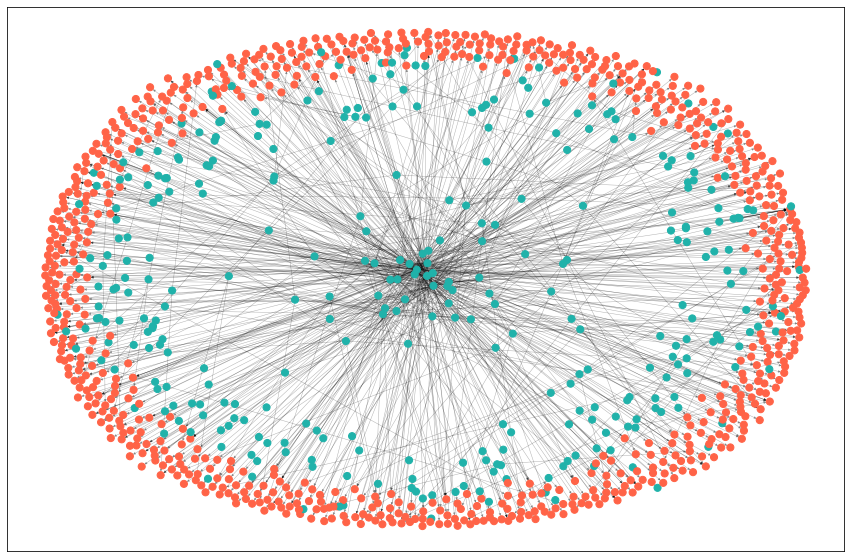

In [0]:
# https://stackoverflow.com/questions/45720931/pyspark-how-to-visualize-a-graphframe, https://stackoverflow.com/questions/27030473/how-to-set-colors-for-nodes-in-networkx
def PlotGraph(edge_list):
    G = nx.DiGraph()
    for row in edge_list.select('src','dst').take(1000):
      G.add_edge(row['src'], row['dst'])
    color_map = []
    for node in G:
      if node < 100000:
        color_map.append('lightseagreen')
      else: 
        color_map.append('tomato') 
    plt.figure(figsize=(15,10))
    plt.margins(0.0)
    pos=nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos=pos, node_color=color_map, with_labels=False, node_size=50)
    nx.draw_networkx_edges(G, pos=pos, alpha=0.3, width=0.5, arrowsize=5, node_size=50)
    
PlotGraph(graph.edges)

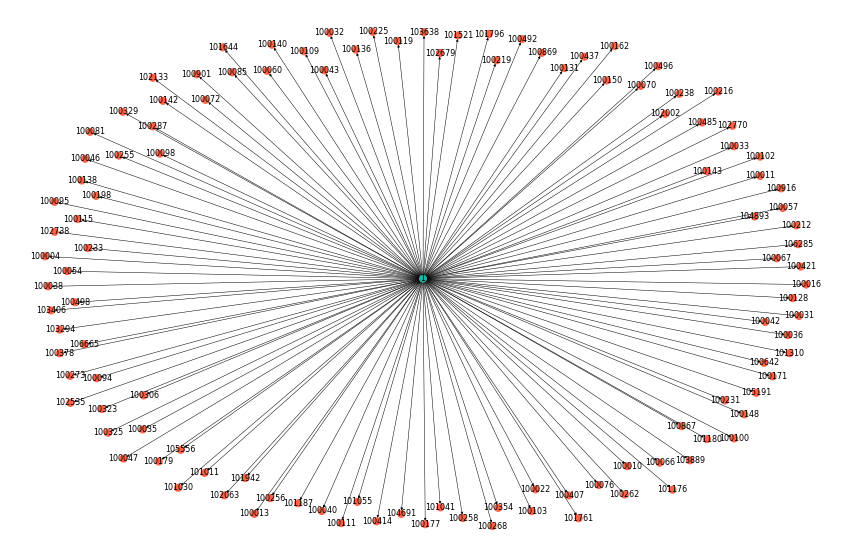

In [0]:
# For book 1 only
def PlotGraph(edge_list):
    G = nx.DiGraph()
    for row in edge_list.select('src','dst').take(1000):
      G.add_edge(row['src'], row['dst'])
    color_map = []
    for node in G:
      if node < 100000:
        color_map.append('lightseagreen')
      else: 
        color_map.append('tomato') 
    plt.figure(figsize=(15,10))
    plt.margins(0.0)
    nx.draw(G, node_color=color_map, width=0.5, arrowsize=5, with_labels=True, font_size=8, node_size=50)
    
PlotGraph(graph.filterEdges(f.col("src") == 1).edges)

In [0]:
# Dataframe approach
graph.edges.groupBy("src").count().orderBy("count", ascending=False).show(5)

+-----+-----+
 src|count|
+-----+-----+
12381| 195|
52036| 194|
12874| 194|
30944| 193|
45554| 189|
+-----+-----+
only showing top 5 rows

In [0]:
# Graph approach
graph.outDegrees.orderBy("outDegree", ascending=False).show(5)

+-----+---------+
 id|outDegree|
+-----+---------+
12381| 195|
52036| 194|
12874| 194|
30944| 193|
45554| 189|
+-----+---------+
only showing top 5 rows

In [0]:
# Dataframe approach
graph.edges.groupBy("dst").count().orderBy("count", ascending=False).show(5)

+------+-----+
 dst|count|
+------+-----+
100001|22806|
100002|21850|
100004|19088|
100003|16931|
100005|16604|
+------+-----+
only showing top 5 rows

In [0]:
# Graph approach
graph.inDegrees.orderBy("inDegree", ascending=False).show(5)

+------+--------+
 id|inDegree|
+------+--------+
100001| 22806|
100002| 21850|
100004| 19088|
100003| 16931|
100005| 16604|
+------+--------+
only showing top 5 rows

In [0]:
# New books with the highest ratings
g1 = graph.filterVertices(f.col("original_publication_year") > 2000)
g1.vertices.select("id", "title", "original_publication_year", "average_rating").orderBy("average_rating", ascending=False).show(5, truncate=False)

+------+------------------------------------------------------+-------------------------+--------------+
id |title |original_publication_year|average_rating|
+------+------------------------------------------------------+-------------------------+--------------+
103628|The Complete Calvin and Hobbes |2005.0 |4.82 |
103275|Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)|2003.0 |4.77 |
100862|Words of Radiance (The Stormlight Archive, #2) |2014.0 |4.77 |
107947|ESV Study Bible |2002.0 |4.76 |
103753|Harry Potter Collection (Harry Potter, #1-6) |2005.0 |4.73 |
+------+------------------------------------------------------+-------------------------+--------------+
only showing top 5 rows

In [0]:
# Users who gave the most 1-star ratings
g2 = graph.filterEdges(f.col("rating") == 1)
g2.edges.groupBy("src").count().orderBy("count", ascending=False).show(5, truncate=False)

+-----+-----+
src |count|
+-----+-----+
44171|159 |
49586|141 |
51577|126 |
35678|126 |
49660|124 |
+-----+-----+
only showing top 5 rows

In [0]:
# Find 3 users who read the same book
graph.find("(u1)-[r1]->(b); (u2)-[r2]->(b); (u3)-[r3]->(b)").filter("r1 == r2").filter("r2 == r3").show()

+--------------------+---------------+--------------------+--------------------+---------------+--------------------+---------------+
 u1| r1| b| u2| r2| u3| r3|
+--------------------+---------------+--------------------+--------------------+---------------+--------------------+---------------+
[2, User, [233, 3...| [2, 100002, 5]|[100002, Book,, [...|[2, User, [233, 3...| [2, 100002, 5]|[2, User, [233, 3...| [2, 100002, 5]|
[8, User, [8792, ...| [8, 100479, 4]|[100479, Book,, [...|[8, User, [8792, ...| [8, 100479, 4]|[8, User, [8792, ...| [8, 100479, 4]|
[8, User, [8792, ...| [8, 100899, 2]|[100899, Book,, [...|[8, User, [8792, ...| [8, 100899, 2]|[8, User, [8792, ...| [8, 100899, 2]|
[14, User, [5076,...|[14, 100060, 3]|[100060, Book,, [...|[14, User, [5076,...|[14, 100060, 3]|[14, User, [5076,...|[14, 100060, 3]|
[14, User, [5076,...|[14, 100070, 4]|[100070, Book,, [...|[14, User, [5076,...|[14, 100070, 4]|[14, User, [5076,...|[14, 100070, 4]|
[15, User, [5210,...|[15, 100484, 3]|[100484, Book,, [...|[15, User, [5210,...|[15, 100484, 3]|[15, User, [5210,...|[15, 100484, 3]|
[23, User, [273, ...|[23, 101740, 3]|[101740, Book,, [...|[23, User, [273, ...|[23, 101740, 3]|[23, User, [273, ...|[23, 101740, 3]|
[30, User, [407, ...|[30, 101239, 4]|[101239, Book,, [...|[30, User, [407, ...|[30, 101239, 4]|[30, User, [407, ...|[30, 101239, 4]|
[31, User, [1682,...|[31, 100719, 4]|[100719, Book,, [...|[31, User, [1682,...|[31, 100719, 4]|[31, User, [1682,...|[31, 100719, 4]|
[32, User, [3646,...|[32, 100654, 4]|[100654, Book,, [...|[32, User, [3646,...|[32, 100654, 4]|[32, User, [3646,...|[32, 100654, 4]|
[33, User, [610, ...|[33, 100940, 5]|[100940, Book,, [...|[33, User, [610, ...|[33, 100940, 5]|[33, User, [610, ...|[33, 100940, 5]|
[34, User, [1591,...|[34, 102493, 3]|[102493, Book,, [...|[34, User, [1591,...|[34, 102493, 3]|[34, User, [1591,...|[34, 102493, 3]|
[36, User, [748, ...|[36, 101272, 4]|[101272, Book,, [...|[36, User, [748, ...|[36, 101272, 4]|[36, User, [748, ...|[36, 101272, 4]|
[40, User, [1657,...|[40, 100113, 4]|[100113, Book,, [...|[40, User, [1657,...|[40, 100113, 4]|[40, User, [1657,...|[40, 100113, 4]|
[44, User, [4111]...|[44, 100038, 5]|[100038, Book,, [...|[44, User, [4111]...|[44, 100038, 5]|[44, User, [4111]...|[44, 100038, 5]|
[46, User, [2288,...|[46, 105861, 5]|[105861, Book,, [...|[46, User, [2288,...|[46, 105861, 5]|[46, User, [2288,...|[46, 105861, 5]|
[47, User, [5416,...|[47, 105412, 3]|[105412, Book,, [...|[47, User, [5416,...|[47, 105412, 3]|[47, User, [5416,...|[47, 105412, 3]|
[47, User, [5416,...|[47, 106096, 2]|[106096, Book,, [...|[47, User, [5416,...|[47, 106096, 2]|[47, User, [5416,...|[47, 106096, 2]|
[49, User, [754],...|[49, 101238, 4]|[101238, Book,, [...|[49, User, [754],...|[49, 101238, 4]|[49, User, [754],...|[49, 101238, 4]|
[54, User, [146, ...|[54, 100737, 4]|[100737, Book,, [...|[54, User, [146, ...|[54, 100737, 4]|[54, User, [146, ...|[54, 100737, 4]|
+--------------------+---------------+--------------------+--------------------+---------------+--------------------+---------------+
only showing top 20 rows

In [0]:
# Find path between User 1 and Book 100001
bfs = graph.bfs("id = 1", "id = 100004", maxPathLength=10)
bfs.show()

+--------------------+--------------+--------------------+
 from| e0| to|
+--------------------+--------------+--------------------+
[1, User, [235, 3...|[1, 100004, 5]|[100004, Book,, [...|
+--------------------+--------------+--------------------+

In [0]:
lp = graph.labelPropagation(maxIter=4)
lp.show()

+------+----+--------------------+-------------------+-------------------------+--------------------+--------------------+-------------------+--------------------+---------+--------------------+--------------+------------------+------+
 id|type| to_read| authors|original_publication_year| title| description| genre| popular_shelves|num_pages| similar_books|average_rating|work_ratings_count| label|
+------+----+--------------------+-------------------+-------------------------+--------------------+--------------------+-------------------+--------------------+---------+--------------------+--------------+------------------+------+
 2040|User|[459, 7356, 5578,...| null| null| null| null| null| null| null| null| null| null| 38420|
 4590|User| [63, 100, 1367]| null| null| null| null| null| null| null| null| null| null| 38420|
103496|Book| null| [Jeaniene Frost]| 2011.0|This Side of the ...|Danger waits on b...|fantasy, paranormal|[[12021, to-read]...| 357|[7307503, 9581001...| 4.28| 49424|100137|
 48280|User|[6800, 1952, 282,...| null| null| null| null| null| null| null| null| null| null| 38420|
 32912|User|[139, 2071, 5, 24...| null| null| null| null| null| null| null| null| null| null| 12572|
 26486|User|[5765, 81, 437, 1...| null| null| null| null| null| null| null| null| null| null| 38420|
 42126|User|[5634, 5552, 74, ...| null| null| null| null| null| null| null| null| null| null| 12572|
 34340|User|[350, 778, 788, 8...| null| null| null| null| null| null| null| null| null| null| 38420|
 23766|User|[4161, 1541, 2376...| null| null| null| null| null| null| null| null| null| null| 38420|
 1258|User|[5210, 1167, 7777...| null| null| null| null| null| null| null| null| null| null| 38420|
 38114|User|[5090, 2396, 1294...| null| null| null| null| null| null| null| null| null| null| 38420|
107338|Book| null|[Kurt Vonnegut Jr.]| 1999.0|God Bless You, Dr...|From Slapstick's ...| fiction|[[1675, to-read],...| 80|[409963, 28134, 1...| 3.83| 12640|100119|
 1224|User|[437, 7573, 670, ...| null| null| null| null| null| null| null| null| null| null| 38420|
 34476|User|[2114, 901, 9273,...| null| null| null| null| null| null| null| null| null| null| 38420|
 1360|User|[883, 8255, 565, ...| null| null| null| null| null| null| null| null| null| null| 38420|
 8092|User|[1453, 3855, 1242...| null| null| null| null| null| null| null| null| null| null| 38420|
 52904|User|[233, 502, 9104, ...| null| null| null| null| null| null| null| null| null| null| 38420|
 22916|User|[27, 2075, 4732, ...| null| null| null| null| null| null| null| null| null| null| 38420|
 45390|User|[3327, 1730, 1904...| null| null| null| null| null| null| null| null| null| null| 38420|
 20638|User|[60, 1, 139, 4858...| null| null| null| null| null| null| null| null| null| null| 38420|
+------+----+--------------------+-------------------+-------------------------+--------------------+--------------------+-------------------+--------------------+---------+--------------------+--------------+------------------+------+
only showing top 20 rows

In [0]:
lp.select(f.countDistinct("label")).collect()[0][0]

Out[46]: 28

In [0]:
lp.groupBy("label").count().sort("count").show()

+------+-----+
 label|count|
+------+-----+
 47643| 1|
107512| 1|
 41282| 1|
 38016| 2|
100155| 3|
 48325| 3|
 3672| 4|
 23024| 5|
 32041| 10|
 33252| 13|
 12240| 16|
 37989| 19|
 25994| 45|
 32068| 54|
 47230| 68|
 52811| 112|
100146| 144|
100137| 185|
 25097| 234|
 29520| 273|
+------+-----+
only showing top 20 rows

In [0]:
assembler = VectorAssembler(inputCols=["id"], outputCol="features")
data = assembler.transform(lp).withColumnRenamed("label", "prediction")

evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(data)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = -0.6756209195146685

In [0]:
pr = graph.pageRank(resetProbability=0.15, tol=0.01)
pr.vertices.select("id", "authors", "title", "average_rating", "pagerank").orderBy("pagerank", ascending=False).show(10, truncate=False)

+------+-----------------------------------------+-----------------------------------------------------------+--------------+------------------+
id |authors |title |average_rating|pagerank |
+------+-----------------------------------------+-----------------------------------------------------------+--------------+------------------+
100001|[Suzanne Collins] |The Hunger Games (The Hunger Games, #1) |4.34 |109.78912183855833|
100002|[J.K. Rowling, Mary GrandPré] |Harry Potter and the Sorcerer's Stone (Harry Potter, #1) |4.44 |107.38994834648915|
100004|[Harper Lee] |To Kill a Mockingbird |4.25 |90.41931338084808 |
100003|[Stephenie Meyer] |Twilight (Twilight, #1) |3.57 |83.92826806689399 |
100017|[Suzanne Collins] |Catching Fire (The Hunger Games, #2) |4.3 |78.31839265276636 |
100005|[F. Scott Fitzgerald] |The Great Gatsby |3.89 |78.19349980816428 |
100018|[J.K. Rowling, Mary GrandPré, Rufus Beck]|Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)|4.53 |76.3333847758773 |
100020|[Suzanne Collins] |Mockingjay (The Hunger Games, #3) |4.03 |75.4327041142575 |
100023|[J.K. Rowling, Mary GrandPré] |Harry Potter and the Chamber of Secrets (Harry Potter, #2) |4.37 |75.35693695837682 |
100024|[J.K. Rowling, Mary GrandPré] |Harry Potter and the Goblet of Fire (Harry Potter, #4) |4.53 |74.6460490367737 |
+------+-----------------------------------------+-----------------------------------------------------------+--------------+------------------+
only showing top 10 rows

In [0]:
graph.edges.groupBy("dst").count().orderBy("count", ascending=False).show(10)

+------+-----+
 dst|count|
+------+-----+
100001|22806|
100002|21850|
100004|19088|
100003|16931|
100005|16604|
100017|16549|
100020|15953|
100018|15855|
100023|15657|
100007|15558|
+------+-----+
only showing top 10 rows

In [0]:
display(pr.vertices.orderBy("pagerank", ascending=False).limit(20))

id,type,to_read,authors,original_publication_year,title,description,genre,popular_shelves,num_pages,similar_books,average_rating,work_ratings_count,pagerank
100001,Book,null,List(Suzanne Collins),2008.0,"The Hunger Games (The Hunger Games, #1)","Winning will make you famous. Losing means certain death. The nation of Panem, formed from a post-apocalyptic North America, is a country that consists of a wealthy Capitol region surrounded by 12 poorer districts. Early in its history, a rebellion led by a 13th district against the Capitol resulted in its destruction and the creation of an annual televised event known as the Hunger Games. In punishment, and as a reminder of the power and grace of the Capitol, each district must yield one boy and one girl between the ages of 12 and 18 through a lottery system to participate in the games. The 'tributes' are chosen during the annual Reaping and are forced to fight to the death, leaving only one survivor to claim victory. When 16-year-old Katniss's young sister, Prim, is selected as District 12's female representative, Katniss volunteers to take her place. She and her male counterpart Peeta, are pitted against bigger, stronger representatives, some of whom have trained for this their whole lives. , she sees it as a death sentence. But Katniss has been close to death before. For her, survival is second nature.",young-adult,"List(List(51031, favorites), List(36685, currently-reading), List(33289, to-read), List(26315, young-adult), List(14021, fiction), List(13167, dystopian), List(11235, dystopia), List(10996, fantasy), List(10995, ya), List(8922, science-fiction), List(7243, books-i-own), List(6345, sci-fi), List(5094, series), List(5068, owned), List(4229, favourites), List(3390, romance), List(3200, adventure), List(2911, hunger-games), List(2017, book-club), List(1998, kindle), List(1778, teen), List(1478, read-in-2012), List(1465, post-apocalyptic), List(1463, my-books), List(1443, the-hunger-games), List(1422, favorite-books), List(1266, action), List(1217, re-read), List(1215, suzanne-collins), List(1161, all-time-favorites), List(1142, ya-fiction), List(1129, sci-fi-fantasy), List(1125, survival), List(1125, books), List(1091, favorite), List(1054, 5-stars), List(1048, scifi), List(935, i-own), List(925, read-in-2011), List(921, novels), List(912, ebook), List(890, audiobook), List(878, young-adult-fiction), List(803, thriller), List(786, my-favorites), List(776, audiobooks), List(736, read-2012), List(724, default), List(701, futuristic), List(690, ebooks), List(679, library), List(670, fantasy-sci-fi), List(642, suspense), List(618, reread), List(617, shelfari-favorites), List(616, faves), List(598, read-in-2010), List(578, my-library), List(535, audio), List(532, ya-lit), List(530, ya-books), List(526, teen-fiction), List(524, favorite-series), List(513, own-it), List(507, finished), List(494, action-adventure), List(488, love), List(486, love-triangle), List(478, favs), List(458, read-in-2013), List(457, loved), List(453, distopia), List(447, coming-of-age), List(446, dystopian-fiction), List(443, english), List(442, distopian), List(441, borrowed), List(430, to-buy), List(426, novel), List(412, favourite), List(409, read-more-than-once), List(408, ya-fantasy), List(406, scifi-fantasy), List(405, read-2011), List(403, favourite-books), List(390, future), List(384, read-in-2014), List(383, contemporary), List(381, trilogy), List(371, dystopias), List(369, speculative-fiction), List(368, ya-dystopian), List(367, e-book), List(364, reviewed), List(357, 2012-reads), List(353, finished-series), List(350, sf), List(350, completed-series), List(345, on-my-shelf), List(344, drama))",374,"List(1902241, 146499, 954674, 9917938, 10165727, 7826116, 8901953, 10025305, 153785, 199786, 13425846, 7304203, 295650, 775977, 9424367, 10637766, 6527740, 7849341)",4.34,4942365,109.78912183855833
100002,Book,null,"List(J.K. Rowling, Mary GrandPré)",1997.0,"Harry Potter and the Sorcerer's Stone (Harry

In [0]:
from pyspark.ml.clustering import PowerIterationClustering

pic = PowerIterationClustering(k=30, maxIter=10, weightCol="rating")
pic_results = pic.assignClusters(graph.edges)

evaluator = ClusteringEvaluator()

assembler = VectorAssembler(inputCols=["id"], outputCol="features")
data = assembler.transform(pic_results).withColumnRenamed("cluster", "prediction")

silhouette = evaluator.evaluate(data)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = -0.38486905549492567

In [0]:
pic_results.filter("id < 100000").groupBy("cluster").agg(f.count("id")).orderBy("cluster").show()

+-------+---------+
cluster|count(id)|
+-------+---------+
 0| 4180|
 2| 150|
 3| 1482|
 4| 297|
 5| 4134|
 6| 6511|
 7| 171|
 9| 241|
 10| 2461|
 12| 2828|
 13| 9879|
 14| 754|
 15| 163|
 16| 9458|
 17| 141|
 18| 189|
 20| 43|
 21| 175|
 23| 284|
 24| 398|
+-------+---------+
only showing top 20 rows

In [0]:
pic_df = graph.edges.join(pic_results, graph.edges.src==pic_results.id, "left")
pic_df.show()

+-----+------+------+-----+-------+
 src| dst|rating| id|cluster|
+-----+------+------+-----+-------+
50255|100515| 4|50255| 5|
50255|103889| 4|50255| 5|
50255|101158| 3|50255| 5|
50255|102411| 3|50255| 5|
50255|106139| 3|50255| 5|
50255|103003| 3|50255| 5|
50255|104062| 3|50255| 5|
50197|101070| 3|50197| 18|
50255|108090| 3|50255| 5|
50255|102595| 2|50255| 5|
50255|102203| 3|50255| 5|
50255|102973| 3|50255| 5|
50255|102478| 2|50255| 5|
50255|102066| 3|50255| 5|
50255|103410| 3|50255| 5|
50255|105052| 3|50255| 5|
50255|103143| 4|50255| 5|
50255|103091| 3|50255| 5|
50255|101131| 3|50255| 5|
28034|102395| 4|28034| 2|
+-----+------+------+-----+-------+
only showing top 20 rows

In [0]:
(training, test) = pic_df.randomSplit([0.8, 0.2])

als = ALS(maxIter=20, regParam=0.01, userCol="cluster", itemCol="dst", ratingCol="rating", coldStartStrategy="drop")
model = als.fit(training)

predictions = model.transform(test)
evaluator = RegressionEvaluator(metricName="rmse", labelCol="rating", predictionCol="prediction")
rmse = evaluator.evaluate(predictions)
print("Root-mean-square error = " + str(rmse))

Root-mean-square error = 0.9479447769610272

In [0]:
userRecs = model.recommendForAllUsers(10)
userRecs.orderBy("cluster").show(5, truncate=False)

+-------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
cluster|recommendations |
+-------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
0 |[[107947, 4.980405], [109479, 4.8989744], [109566, 4.887149], [106920, 4.8833203], [104483, 4.8828535], [109838, 4.8780894], [109569, 4.86868], [106659, 4.868155], [107404, 4.8498344], [108854, 4.84633]] |
2 |[[108325, 5.2997775], [103030, 5.1714745], [108500, 5.0479307], [103220, 4.983022], [101264, 4.956241], [103215, 4.923103], [108569, 4.9179535], [100460, 4.9026427], [101308, 4.902277], [107786, 4.8734097]] |
3 |[[107947, 5.0926466], [109055, 4.983219], [109141, 4.9522333], [108854, 4.9375205], [109385, 4.9160886], [104778, 4.9082136], [109712, 4.891588], [101618, 4.8815556], [101308, 4.8802075], [109569, 4.8711095]]|
4 |[[107419, 5.355895], [108964, 5.2888656], [106227, 5.191963], [107947, 5.183407], [108719, 5.15888], [109475, 5.149905], [109470, 5.1296244], [102613, 5.1275673], [107902, 5.0995502], [108926, 5.093774]] |
5 |[[109531, 4.8014517], [106400, 4.7376432], [103628, 4.7142353], [109004, 4.711767], [109537, 4.7072463], [107264, 4.706945], [103491, 4.697565], [107945, 4.6734056], [109842, 4.662992], [109566, 4.6462502]] |
+-------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
only showing top 5 rows

In [0]:
pic_df = pic_df.join(userRecs, "cluster", "left")

In [0]:
def recommend_for_user(user_id):
  res = pic_df.filter(pic_df.src==user_id).select("recommendations.dst").take(1)[0][0]
  for r in res:
    print(get_book_title(r))

recommend_for_user(1)

Crush
The Beatles Anthology
The Complete Calvin and Hobbes
The Path to Power (The Years of Lyndon Johnson, #1)
Plenty
Master of the Senate (The Years of Lyndon Johnson, #3)
Just Mercy: A Story of Justice and Redemption
Ender's Game, Volume 2: Command School
Humans of New York: Stories
Attack of the Deranged Mutant Killer Monster Snow Goons